# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import talib
import yfinance as yf
import nltk
import pynance as pn

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Antifragile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Antifragile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import os
print(os.getcwd())

c:\Users\Antifragile\Downloads


# Load and prepare data

In [4]:
# Load and prepare data
aapl_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\AAPL_historical_data.csv', parse_dates=['Date'])

In [6]:
# Dictionary to store stock data
stocks = {'AAPL': aapl_data}
results = {}

In [5]:
import pandas as pd

# Load all CSVs into separate DataFrames
tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]
dfs = {}

for ticker in tickers:
    df = aapl_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\AAPL_historical_data.csv', parse_dates=['Date'])
    df = df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
    df.sort_values("Date", inplace=True)
    df.reset_index(drop=True, inplace=True)
    dfs[ticker] = df


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_20260\3149843737.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Date", inplace=True)
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_20260\3149843737.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Date", inplace=True)
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_20260\3149843737.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.so

In [6]:
# Inspect the index 
print(aapl_data.index)

# Inspect the columns
print(aapl_data.columns)

# Select only the last 10 observations of `Close`
ts = aapl_data['Close'][-10:]

# Check the type of `ts` 
type(ts)

RangeIndex(start=0, stop=10998, step=1)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


pandas.core.series.Series

In [7]:
# Ensure required columns
for df in [aapl_data]:
    df.columns = df.columns.str.lower()  # Normalize column names
    required_cols = ['date', 'open', 'high', 'low', 'close', 'volume']
    assert all(col in df.columns for col in required_cols), f"Missing columns in {df}"


In [8]:

# Load data and set Date as index (do this only once)
aapl_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\AAPL_historical_data.csv', parse_dates=['Date'])
aapl_data.set_index('Date', inplace=True)

# Inspect the first rows of November-December 2006
print(aapl_data.loc['2006-11-01':'2006-12-31'].head())

# Inspect the first rows of 2007 
print(aapl_data.loc['2007'].head())

# Inspect November 2006 by integer location (if needed)
print(aapl_data.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl_data.loc['2006-11-01':'2006-12-31'][['Open', 'Close']].head())
print(aapl_data.loc['2007'][['Open', 'Close']].head())

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2006-11-01  2.896429  2.906429  2.798571  2.827143   2.387452  611192400   
2006-11-02  2.818571  2.832857  2.803571  2.820714   2.382023  465483200   
2006-11-03  2.834286  2.840357  2.778214  2.796071   2.361213  431888800   
2006-11-06  2.819643  2.859286  2.801071  2.846786   2.404040  434576800   
2006-11-07  2.873214  2.892857  2.861786  2.875357   2.428167  525932400   

            Dividends  Stock Splits  
Date                                 
2006-11-01        0.0           0.0  
2006-11-02        0.0           0.0  
2006-11-03        0.0           0.0  
2006-11-06        0.0           0.0  
2006-11-07        0.0           0.0  
                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
2007-01-03  3.081786  3.092143  2.925000  2.992

In [ ]:
# Sample 20 rows
sample = aapl_data.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl_data.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-08-31  152.660004  152.800003  151.289993  151.830002  149.329407   
2005-09-30    1.868929    1.916071    1.852857    1.914643    1.616869   
2010-08-20    8.906786    9.068571    8.892857    8.915714    7.529099   
2000-06-28    0.952009    0.988839    0.919643    0.972098    0.820913   
1988-08-29    0.363839    0.366071    0.361607    0.364955    0.284404   
2021-02-18  129.199997  130.000000  127.410004  129.710007  127.166870   
1999-02-26    0.325893    0.330357    0.308036    0.310826    0.262485   
2006-10-13    2.701071    2.745714    2.669286    2.679286    2.262590   
2017-02-01   31.757500   32.622501   31.752501   32.187500   29.842012   
2021-11-11  148.960007  149.429993  147.679993  147.869995  145.646881   
2023-06-01  177.699997  180.119995  176.929993  180.089996  178.931519   
1986-07-09    0.152902    0.155134    

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_15132\1358147082.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aapl = aapl_data.resample('M')


In [13]:
# Add a column `diff` to `aapl` 
aapl_data['diff'] = aapl_data.Open - aapl_data.Close

# Delete the new `diff` column
del aapl_data['diff']

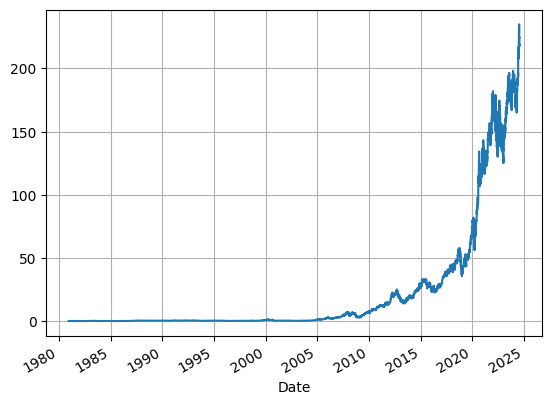

In [12]:
# Plot the closing prices for `aapl`
aapl_data['Close'].plot(grid=True)

# Show the plot
plt.show()

In [11]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl_data[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
1980-12-12   0.000000
1980-12-15  -0.052171
1980-12-16  -0.073398
1980-12-17   0.024751
1980-12-18   0.028992
...               ...
2024-07-24  -0.028754
2024-07-25  -0.004805
2024-07-26   0.002161
2024-07-29   0.001285
2024-07-30   0.002566

[10998 rows x 1 columns]
            Adj Close
Date                 
1980-12-12        NaN
1980-12-15  -0.053581
1980-12-16  -0.076231
1980-12-17   0.024449
1980-12-18   0.028580
...               ...
2024-07-24  -0.029176
2024-07-25  -0.004816
2024-07-26   0.002159
2024-07-29   0.001284
2024-07-30   0.002563

[10998 rows x 1 columns]


In [10]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl_data.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl_data.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_1364\3597344615.py:2: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  monthly = aapl_data.resample('BM').apply(lambda x: x[-1])
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_1364\3597344615.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly = aapl_data.resample('BM').apply(lambda x: x[-1])
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_1364\3597344615.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarter = aapl_data.resample("4M").mean()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-04-30,-0.094185,-0.094089,-0.095811,-0.095811,-0.095811,-0.747477,NaN,NaN
1981-08-31,-0.033490,-0.033142,-0.033520,-0.033520,-0.033520,0.241629,NaN,NaN
1981-12-31,-0.289871,-0.288971,-0.289884,-0.289884,-0.289884,0.186656,NaN,NaN
1982-04-30,-0.055217,-0.055726,-0.056022,-0.056022,-0.056022,0.384146,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-04-30,0.037695,0.036328,0.045797,0.042774,0.044825,-0.260899,0.037037,NaN
2023-08-31,0.206826,0.201202,0.207676,0.202303,0.204646,-0.121052,0.965622,NaN
2023-12-31,0.001787,0.001928,0.001536,0.002550,0.004377,-0.010061,-0.481928,NaN


In [14]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
1980-12-12        NaN
1980-12-15  -0.052171
1980-12-16  -0.073398
1980-12-17   0.024751
1980-12-18   0.028992
...               ...
2024-07-24  -0.028754
2024-07-25  -0.004805
2024-07-26   0.002161
2024-07-29   0.001285
2024-07-30   0.002566

[10998 rows x 1 columns]


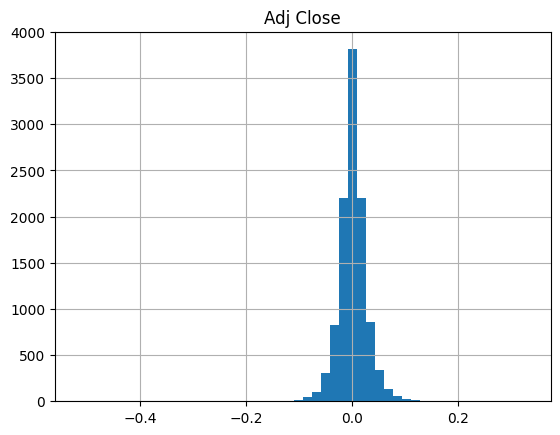

          Adj Close
count  10997.000000
mean       0.001096
std        0.027892
min       -0.518692
25%       -0.012674
50%        0.000000
75%        0.014451
max        0.332281


In [ ]:

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [ ]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

              Adj Close
Date                   
1980-12-12          NaN
1980-12-15     0.947829
1980-12-16     0.878261
1980-12-17     0.899999
1980-12-18     0.926091
...                 ...
2024-07-24  2206.187813
2024-07-25  2195.588126
2024-07-26  2200.332786
2024-07-29  2203.159441
2024-07-30  2208.812751

[10998 rows x 1 columns]


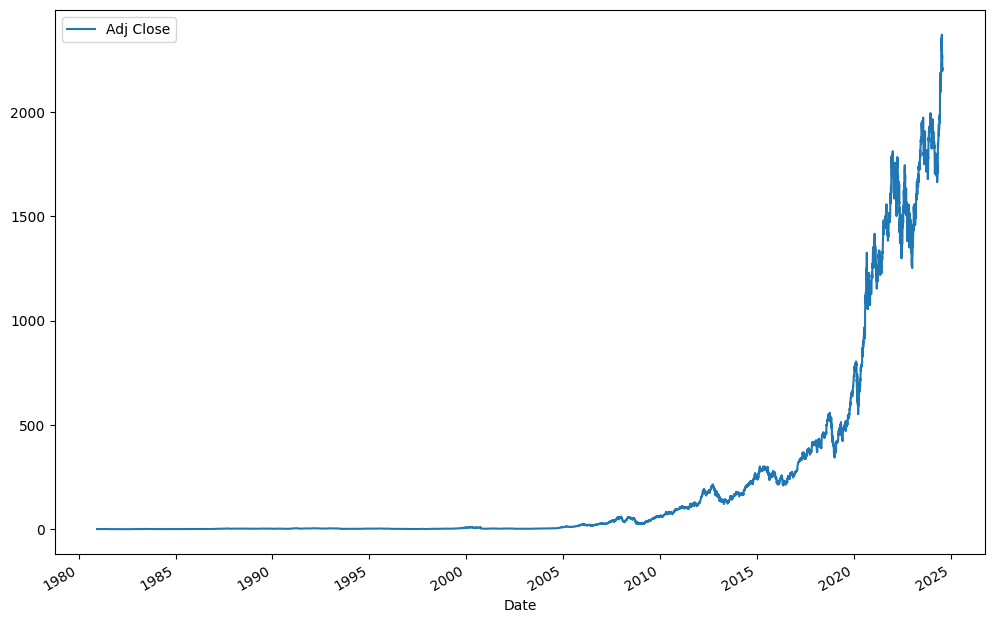

In [ ]:
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [9]:
# Technical Indicators using TA-Lib
aapl_data['SMA20'] = talib.SMA(aapl_data['Close'], timeperiod=20)
aapl_data['RSI'] = talib.RSI(aapl_data['Close'], timeperiod=14)
aapl_data['MACD'], aapl_data['MACD_signal# Technical Indicators (TA-Lib)'], aapl_data['MACD_hist'] = talib.MACD(aapl_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [ ]:
# Isolate the adjusted closing prices 
adj_close_px = aapl_data['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2024-07-17    208.872482
2024-07-18    209.700024
2024-07-19    210.498100
2024-07-22    211.323644
2024-07-23    212.275792
2024-07-24    212.988966
2024-07-25    213.675671
2024-07-26    214.366622
2024-07-29    215.039593
2024-07-30    215.702576
Name: Adj Close, dtype: float64

#Moving Windows

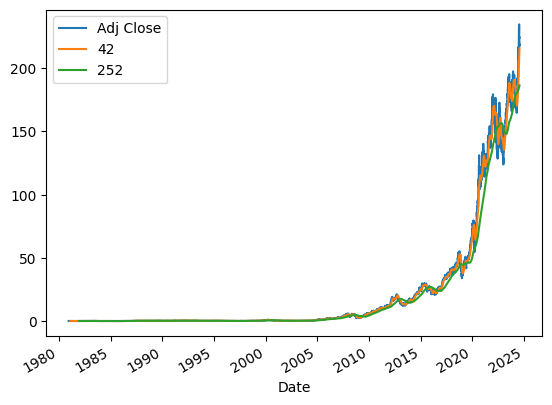

In [ ]:
# Short moving window rolling mean
aapl_data['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl_data['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl_data[['Adj Close', '42', '252']].plot()

plt.show()

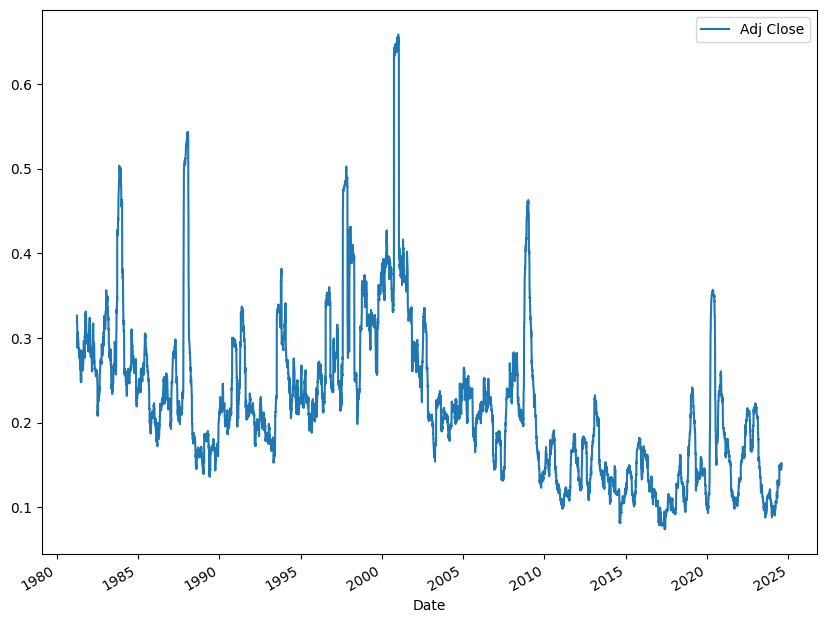

In [15]:
min_periods = 75 

# Calculate the volatility
vol = daily_pct_c.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [29]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl_data.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl_data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl_data['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_18384\2694268798.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_15132\3657940314.py:14: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax1.plot(signals.loc[signals.positions == 1.0].index,


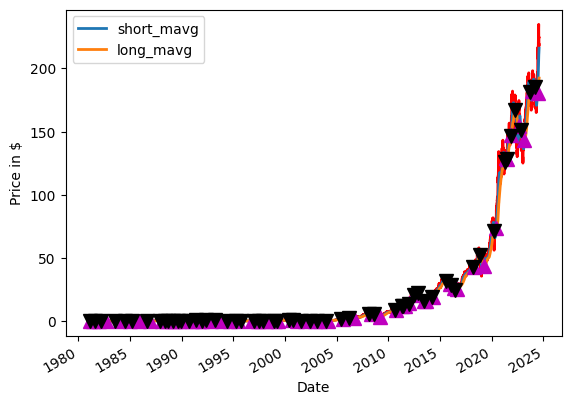

In [ ]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl_data['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

         

#Portfolio Simulation

In [ ]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl_data['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl_data['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl_data['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

#Plot Portfolio Value and Trades 

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_15132\1404651309.py:9: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax1.plot(portfolio.loc[signals.positions == 1.0].index,


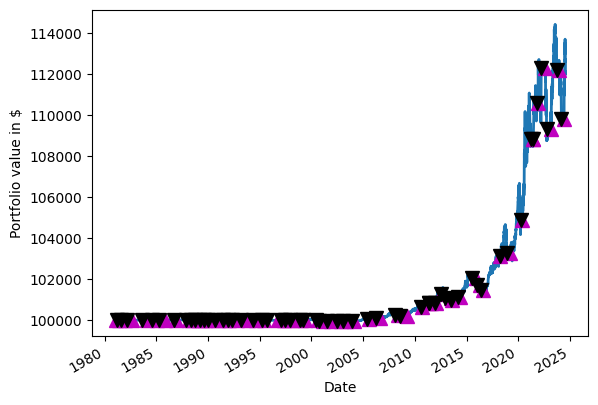

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')
# Show the plot
plt.show()



#Sharpe Ratio

In [ ]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.25822056577688496


#Maximum Drawdown

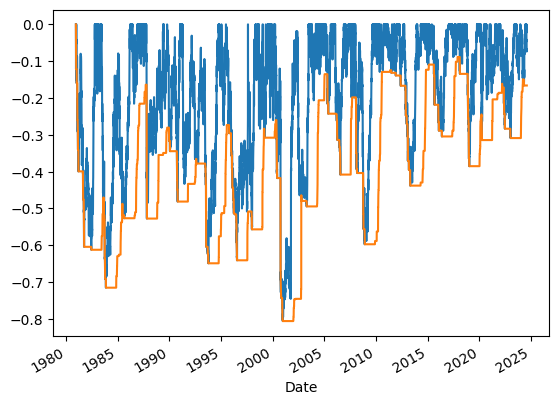

In [ ]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl_data['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl_data['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()
# Show the plot
plt.show()

In [ ]:
# Get the number of days in `aapl`
days = (aapl_data.index[-1] - aapl_data.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl_data['Adj Close'][-1]) / aapl_data['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.19434000543807373


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_15132\2800324564.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = ((((aapl_data['Adj Close'][-1]) / aapl_data['Adj Close'][1])) ** (365.0/days)) - 1


#Plot SMA

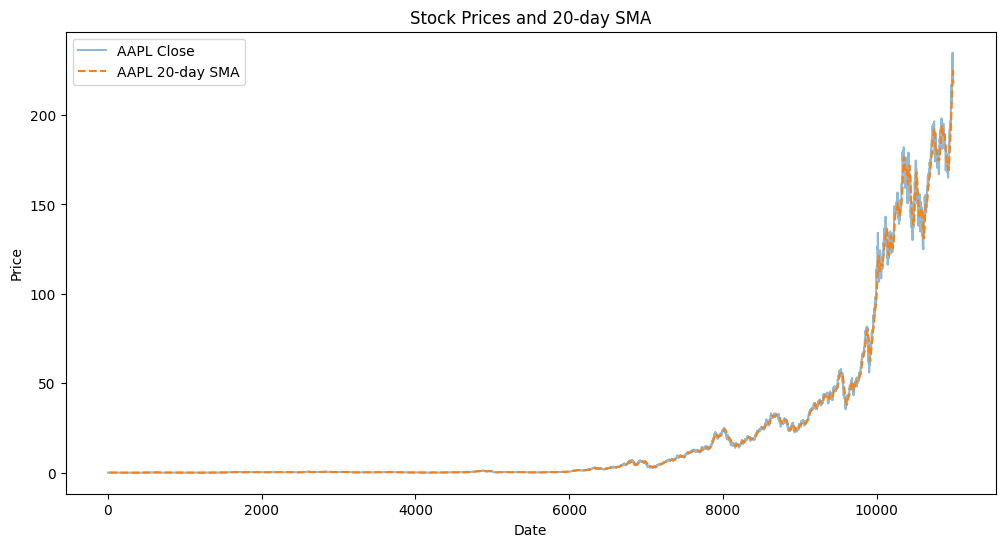

In [10]:
 #20-day SMA (using TA-Lib)
for stock, data in stocks.items():
    data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)

# Plot 20-day SMA
plt.figure(figsize=(12, 6))
for stock, data in stocks.items():
    plt.plot(data.index, data['Close'], label=f'{stock} Close', alpha=0.5)
    plt.plot(data.index, data['SMA_20'], label=f'{stock} 20-day SMA', linestyle='--')
plt.title('Stock Prices and 20-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('sma_20.png')
plt.show()

#Plt MACD

In [7]:
 # MACD Analysis (using TA-Lib)
for stock, data in stocks.items():
    data['MACD'], data['Signal_Line'], _ = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

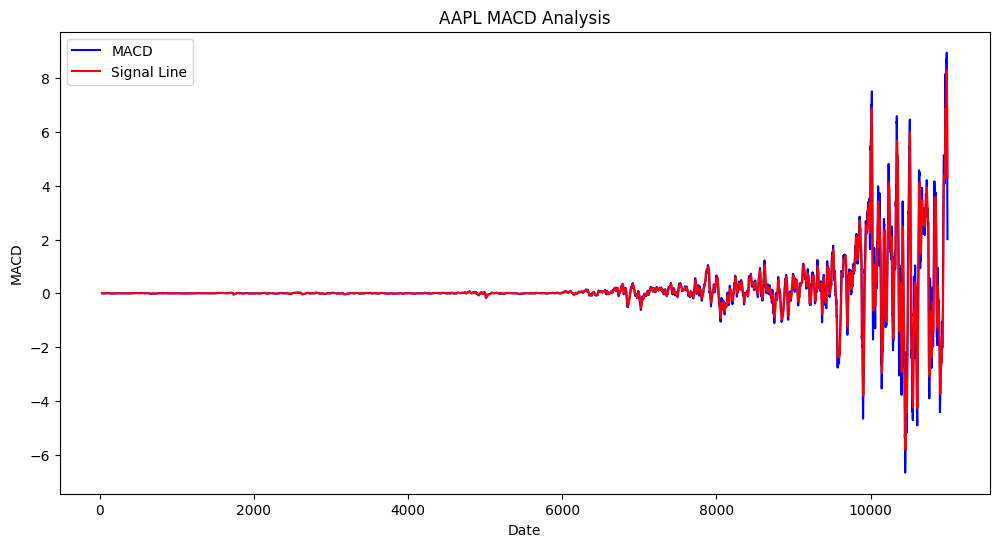

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(stocks['AAPL'].index, stocks['AAPL']['MACD'], label='MACD', color='b')
plt.plot(stocks['AAPL'].index, stocks['AAPL']['Signal_Line'], label='Signal Line', color='r')
plt.title('AAPL MACD Analysis')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.savefig('macd_aapl.png')
plt.show()

Plot RSI

In [9]:
aapl_data['RSI'] = talib.RSI(aapl_data['Close'], timeperiod=14)

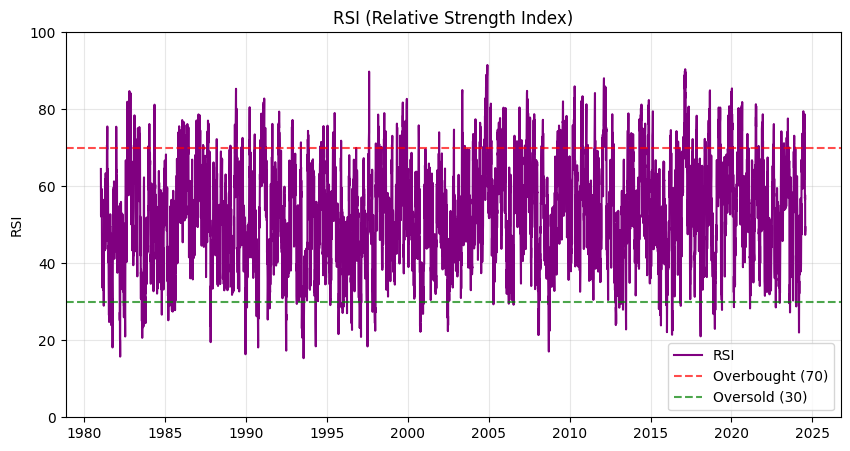

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(aapl_data.index, aapl_data['RSI'], label='RSI', color='purple')
plt.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')
plt.title('RSI (Relative Strength Index)')
plt.ylabel('RSI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)
plt.show()

#Plot Bollinger

In [25]:
# Calculate Bollinger Bands (20-day window, 2 std)
window = 20
aapl_data['SMA20'] = aapl_data['Close'].rolling(window).mean()
aapl_data['BB_Upper'] = aapl_data['SMA20'] + 2 * aapl_data['Close'].rolling(window).std()
aapl_data['BB_Lower'] = aapl_data['SMA20'] - 2 * aapl_data['Close'].rolling(window).std()

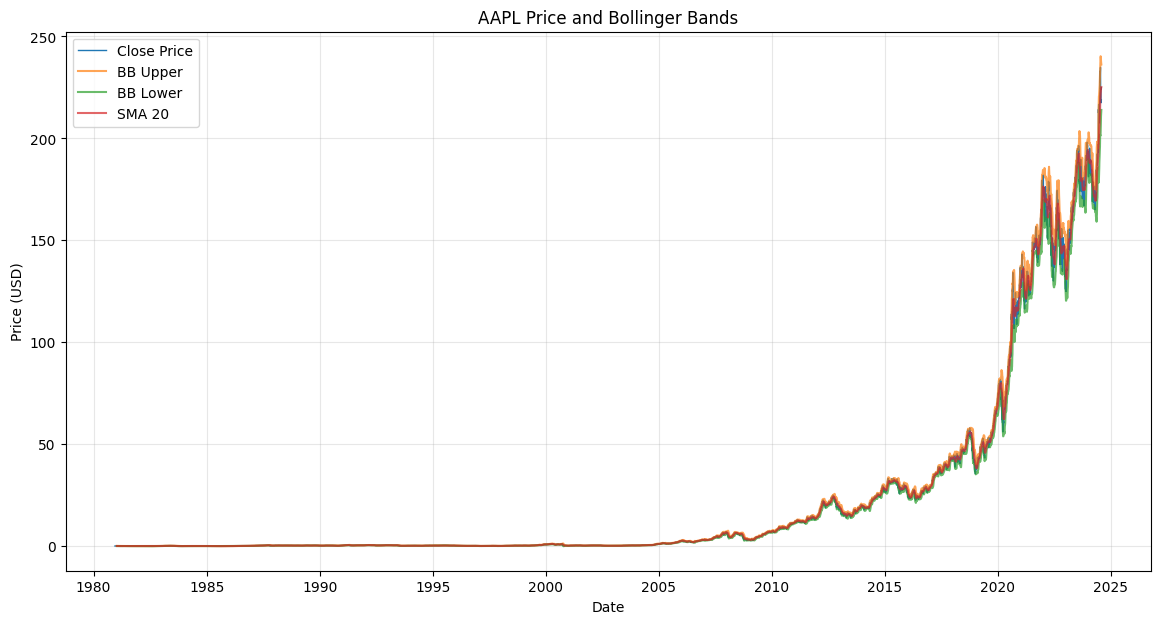

In [26]:
plt.figure(figsize=(14, 7))

# Plot Close price
plt.plot(aapl_data.index, aapl_data['Close'], label='Close Price', linewidth=1)

# Plot Bollinger Bands (make sure you have calculated these columns first)
plt.plot(aapl_data.index, aapl_data['BB_Upper'], label='BB Upper', alpha=0.7)
plt.plot(aapl_data.index, aapl_data['BB_Lower'], label='BB Lower', alpha=0.7)
plt.plot(aapl_data.index, aapl_data['SMA20'], label='SMA 20', alpha=0.7)

plt.fill_between(aapl_data.index, aapl_data['BB_Upper'], aapl_data['BB_Lower'], alpha=0.1)

plt.title('AAPL Price and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()